In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Default GPU Device: /device:GPU:0


In [33]:
data = pd.read_csv("aapl.us.txt")

In [34]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [46]:
data.shape

(8364, 7)

In [47]:
data_train = data.iloc[0:8000, 1:2].values
data_test = data.iloc[8000:, 1:2].values

In [88]:
data_full = data.iloc[:, 1:2].values

In [48]:
mm = MinMaxScaler(feature_range = (0,1))
training_scaled = mm.fit_transform(data_train)

In [49]:
X_train = []
Y_train = []

lookback = 30

for i in range(lookback, len(training_scaled)):
    X_train.append(training_scaled[i-lookback:i,0])
    Y_train.append(training_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
batch_size, time_stamps = X_train.shape[0], X_train.shape[1]

In [52]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [53]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [60]:
model.fit(X_train, Y_train, epochs = 10, batch_size=32)

Epoch 1/10
7970/7970 [==============================] - 35s 4ms/step - loss: 3.0060e-04
Epoch 2/10
7970/7970 [==============================] - 35s 4ms/step - loss: 3.1514e-04
Epoch 3/10
7970/7970 [==============================] - 35s 4ms/step - loss: 2.5523e-04
Epoch 4/10
7970/7970 [==============================] - 34s 4ms/step - loss: 2.6957e-04
Epoch 5/10
7970/7970 [==============================] - 35s 4ms/step - loss: 2.1707e-04
Epoch 6/10
7970/7970 [==============================] - 35s 4ms/step - loss: 2.5130e-04
Epoch 7/10
7970/7970 [==============================] - 38s 5ms/step - loss: 2.1960e-04
Epoch 8/10
7970/7970 [==============================] - 37s 5ms/step - loss: 2.2211e-04
Epoch 9/10
7970/7970 [==============================] - 35s 4ms/step - loss: 2.2825e-04
Epoch 10/10
7970/7970 [==============================] - 36s 4ms/step - loss: 2.1291e-04


In [90]:
testing_scaled = mm.fit_transform(data_test)
X_test = []

lookback = 30

for i in range(lookback, len(testing_scaled)):
    X_test.append(testing_scaled[i-lookback:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
batch_size, time_stamps = X_test.shape[0], X_test.shape[1]

In [91]:
ps = model.predict(X_test)

In [92]:
ps2 = mm.inverse_transform(ps)

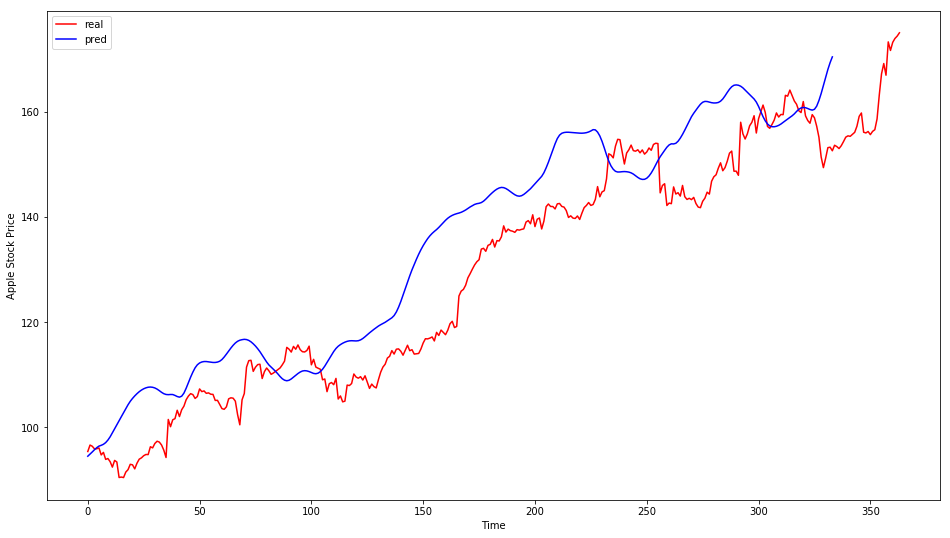

In [105]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(16,9))
plt.plot(data_test, color = 'red', label='real')
plt.plot(ps2, color ='blue', label='pred')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()
